# ANIME RECOMMENDER SYSTEM - EDA (EXPLORATORY DATA ANALYSIS) - ANIME-RATING MERGED

In [23]:
# basic library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import itertools
import collections
import pickle

In [24]:
# load data
anime_df = pd.read_csv('dataset/cleaned_dataset/anime.csv')
anime_df.head(10)

,anime_id,title,score,rating_count,ranked,popularity,members,type,studio,synopsis,episode_count,genre,url,img
0,1,Cowboy Bebop,8.75,872410.0,38.0,43,1688684,TV,Sunrise,Crime is timeless. By the year 2071 humanity h...,26.0,"Action, Sci-Fi, Adult Cast, Space",https://myanimelist.net/anime/1/Cowboy_Bebop,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,199142.0,182.0,584,346712,Movie,Bones,Another day another bounty�such is the life of...,1.0,"Action, Sci-Fi, Adult Cast, Space",https://myanimelist.net/anime/5/Cowboy_Bebop__...,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,8.22,339167.0,323.0,246,685752,TV,Madhouse,Vash the Stampede is the man with a $$60000000...,26.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Adul...",https://myanimelist.net/anime/6/Trigun,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,7.25,42115.0,2737.0,1724,108510,TV,Sunrise,Witches are individuals with special powers li...,26.0,"Action, Drama, Mystery, Supernatural, Detective",https://myanimelist.net/anime/7/Witch_Hunter_R...,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,6.95,6308.0,4173.0,4964,14610,TV,Toei Animation,It is the dark century and the people are suff...,52.0,"Adventure, Fantasy, Supernatural, Shounen",https://myanimelist.net/anime/8/Bouken_Ou_Beet,https://cdn.myanimelist.net/images/anime/7/215...
5,15,Eyeshield 21,7.92,84716.0,687.0,1195,172878,TV,Gallop,Shy reserved and small-statured Deimon High Sc...,145.0,"Sports, Team Sports, Shounen",https://myanimelist.net/anime/15/Eyeshield_21,https://cdn.myanimelist.net/images/anime/12/66...
6,16,Hachimitsu to Clover,8.01,80277.0,566.0,822,252781,TV,J.C.Staff,Yuuta Takemoto a sophomore at an arts college ...,24.0,"Comedy, Drama, Romance, Slice of Life, Love Po...",https://myanimelist.net/anime/16/Hachimitsu_to...,https://cdn.myanimelist.net/images/anime/11/73...
7,17,Hungry Heart: Wild Striker,7.55,12698.0,1528.0,4079,23460,TV,Nippon Animation,Kyosuke Kano has lived under the shadow of his...,52.0,"Comedy, Slice of Life, Sports, Team Sports, Sh...",https://myanimelist.net/anime/17/Hungry_Heart_...,https://cdn.myanimelist.net/images/anime/12/49...
8,18,Initial D Fourth Stage,8.15,92385.0,402.0,1257,162240,TV,A.C.G.T.,Takumi Fujiwara finally joins Ryousuke and Kei...,24.0,"Action, Drama, Racing, Seinen",https://myanimelist.net/anime/18/Initial_D_Fou...,https://cdn.myanimelist.net/images/anime/9/105...
9,19,Monster,8.85,329579.0,23.0,149,917709,TV,Madhouse,Dr. Kenzou Tenma an elite neurosurgeon recentl...,74.0,"Drama, Mystery, Suspense, Adult Cast, Psycholo...",https://myanimelist.net/anime/19/Monster,https://cdn.myanimelist.net/images/anime/10/18...


In [25]:
# load data
rating_df = pd.read_csv('dataset/cleaned_dataset/rating.csv')
rating_df.head()

,user_id,score,num_watched_episodes,created_at,updated_at,anime_id
0,2,4,1,1648845810,1648845810,51478
1,2,4,1,1415823823,1415823823,20707
2,2,5,1,1331102346,1373812370,6408
3,2,5,1,1561119148,1561119148,38045
4,2,6,1,1633699468,1633699468,49668


create dummy rating

In [26]:
list_user_id = []
list_score = []
list_num_watched_episodes = []
list_created_at = []
list_updated_at = []
list_anime_id = []

In [27]:
for i, row in anime_df.iterrows():
    list_user_id.append(1)
    list_score.append(5)
    list_num_watched_episodes.append(1)
    list_created_at.append(1648845810)
    list_updated_at.append(1648845810)
    list_anime_id.append(row.anime_id)

In [28]:
list_tuples = list(zip(list_user_id, list_score, list_num_watched_episodes, list_created_at, list_updated_at, list_anime_id)) 

In [29]:
rating_dummy = pd.DataFrame(list_tuples, columns=['user_id', 'score', 'num_watched_episodes', 'created_at', 'updated_at', 'anime_id']) 

In [30]:
rating_dummy.head()

,user_id,score,num_watched_episodes,created_at,updated_at,anime_id
0,1,5,1,1648845810,1648845810,1
1,1,5,1,1648845810,1648845810,5
2,1,5,1,1648845810,1648845810,6
3,1,5,1,1648845810,1648845810,7
4,1,5,1,1648845810,1648845810,8


In [31]:
rating_df = rating_df.append(rating_dummy)

In [32]:
rating_df.rename(columns = {'score':'user_score'}, inplace = True)

In [33]:
merge_df = pd.merge(rating_df, anime_df, how='left')
merge_df.head()

,user_id,user_score,num_watched_episodes,created_at,updated_at,anime_id,title,score,rating_count,ranked,popularity,members,type,studio,synopsis,episode_count,genre,url,img
0,2,4,1,1648845810,1648845810,51478,!NVADE SHOW!,5.99,200.0,9349.0,15510,364,Unknown,Unknown,Animated music video for RAISE A SUILEN's song...,1.0,Music,https://myanimelist.net/anime/51478/NVADE_SHOW,https://cdn.myanimelist.net/images/anime/1930/...
1,2,4,1,1415823823,1415823823,20707,"""0""",4.65,2265.0,13088.0,8462,3829,Unknown,Minakata Laboratory,This music video tells how a shy girl with a s...,1.0,Music,https://myanimelist.net/anime/20707/-,https://cdn.myanimelist.net/images/anime/12/81...
2,2,5,1,1331102346,1373812370,6408,"""Bungaku Shoujo"" Movie",7.35,26938.0,2262.0,2378,65481,Movie,Production I.G,The protagonist of the story Konoha Inoue is a...,1.0,"Drama, Mystery, Romance, School",https://myanimelist.net/anime/6408/Bungaku_Sho...,https://cdn.myanimelist.net/images/anime/8/811...
3,2,5,1,1561119148,1561119148,38045,"""Calpis"" Hakkou Monogatari",4.75,298.0,12994.0,13694,592,ONA,Unknown,A Calpis Calpico in the US commissioned short ...,1.0,Historical,https://myanimelist.net/anime/38045/Calpis_Hak...,https://cdn.myanimelist.net/images/anime/1168/...
4,2,6,1,1633699468,1633699468,49668,"""Hataraku"" no 100-nenshi",6.06,171.0,8996.0,15707,346,ONA,Gyorai Eizo Inc.,"It's been almost 100 years since the ""salaryma...",1.0,Slice of Life,https://myanimelist.net/anime/49668/Hataraku_n...,https://cdn.myanimelist.net/images/anime/1803/...


<AxesSubplot: >

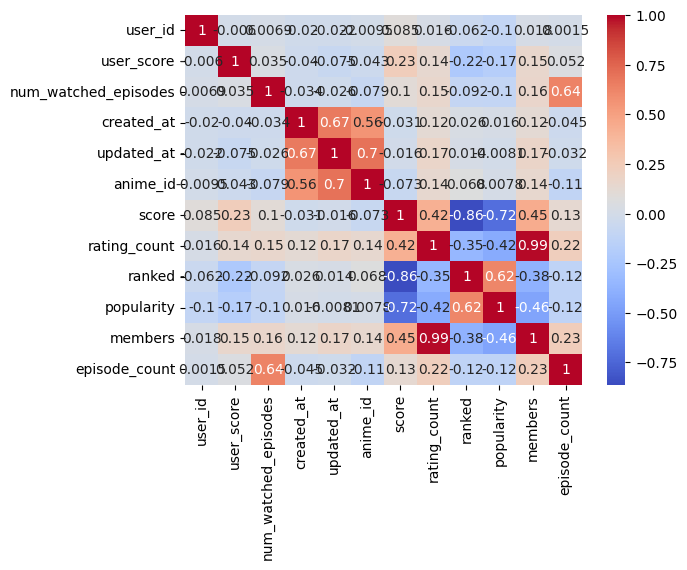

In [36]:
feature_corr = merge_df.corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

<AxesSubplot: >

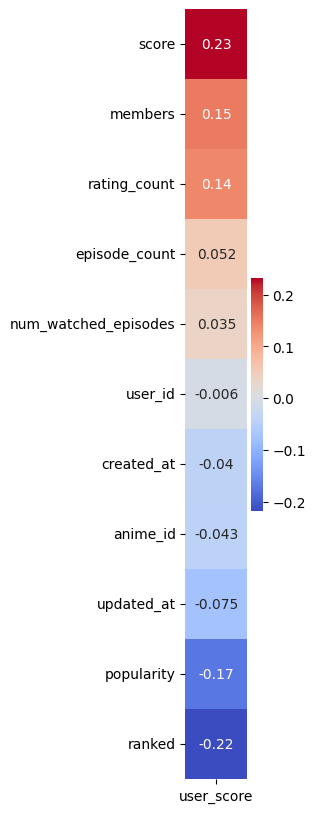

In [37]:
fig = plt.figure(figsize=(1,10))
fig.set_facecolor('white')
sns.heatmap(merge_df.corr()[['user_score']].sort_values('user_score', ascending=False)[1:], annot=True, cmap="coolwarm")